In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import BaseEstimator

In [7]:
test = pd.read_csv("churn-bigml-20.csv")
train = pd.read_csv("churn-bigml-80.csv")

In [8]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
train.shape

(2666, 20)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
test.shape

(667, 20)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [10]:
test.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
train_num = train.select_dtypes(exclude=["bool_", "object_"])

In [13]:
train_num.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [14]:
train_category = train.select_dtypes(exclude=["float64", "int64"])

In [16]:
import pandas as pd
import numpy as np

# Select only numeric columns
train_num = train.select_dtypes(include=[np.number])

# Compute the absolute correlation matrix
corr_abs = train_num.corr().abs()

# Find the upper triangle of the correlation matrix and sort values
sol = (
    corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

# Display all rows (no truncation)
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.min_rows", None)  # Avoid default collapse of rows

# Print the result
print(sol)


Total day minutes      Total day charge          1.000000
Total eve minutes      Total eve charge          1.000000
Total night minutes    Total night charge        0.999999
Total intl minutes     Total intl charge         0.999993
Account length         Total day calls           0.038862
Total intl calls       Total intl charge         0.037363
Total intl minutes     Total intl calls          0.037315
Area code              Customer service calls    0.034442
Total day calls        Total intl charge         0.031133
                       Total intl minutes        0.031036
Area code              Total intl calls          0.027423
Number vmail messages  Total intl calls          0.027013
Total day calls        Total eve charge          0.026006
                       Total eve minutes         0.026003
Total day charge       Customer service calls    0.024548
Total day minutes      Customer service calls    0.024543
Account length         Total night calls         0.024007
Total night ca

In [17]:
#Let's drop the features with highest correlation pair. So I have
# dropped the charge columns which were 99% correlated to their corresponding minutes columns


test.drop(["Total day charge","Total eve charge","Total night charge","Total intl charge"], axis=1, inplace=True)

train.drop(["Total day charge","Total eve charge","Total night charge","Total intl charge"], axis=1, inplace=True)



In [18]:
train_num.drop(["Total day charge","Total eve charge","Total night charge","Total intl charge"], axis=1, inplace=True)

In [19]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [20]:
train_num.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3


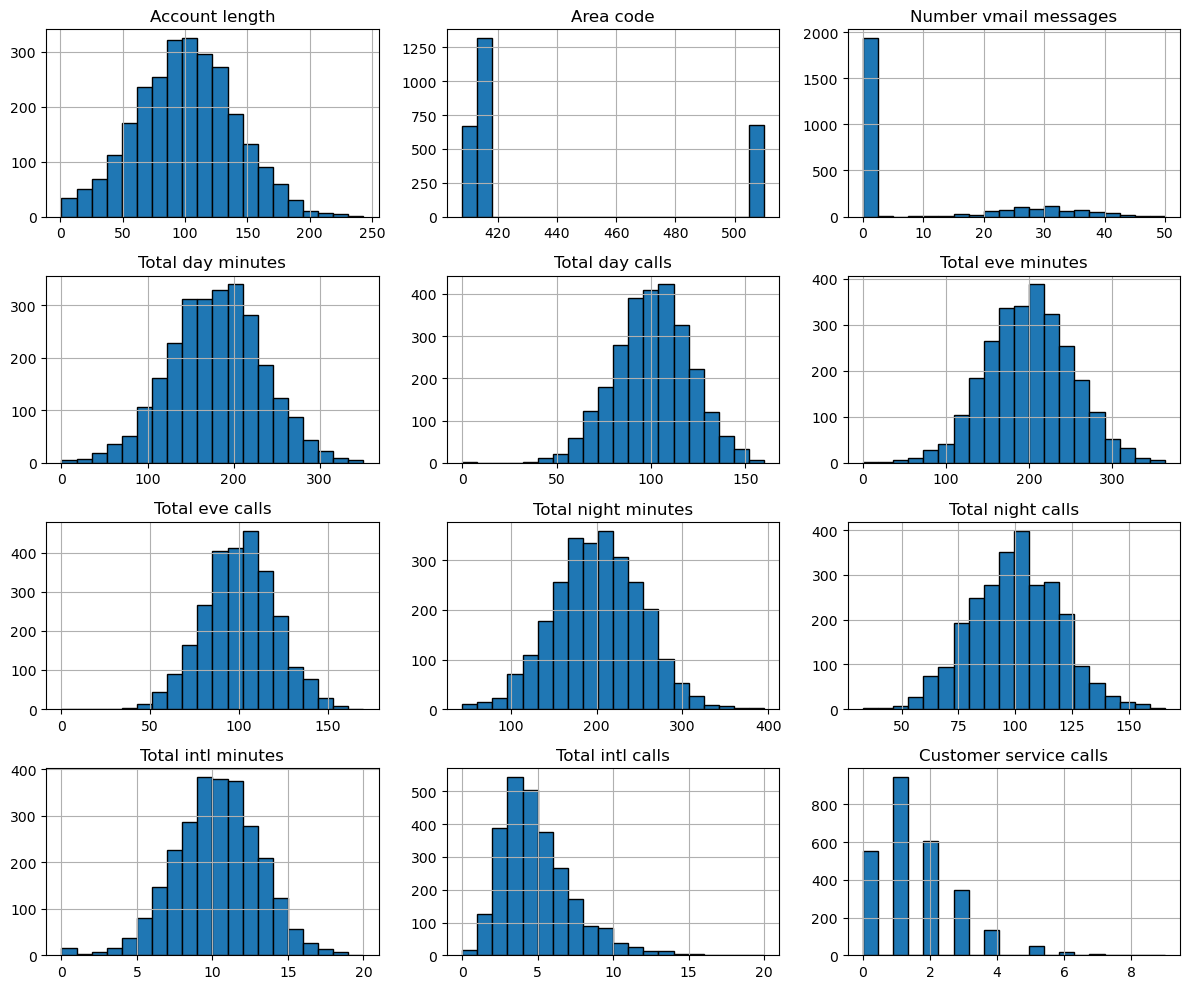

In [21]:
import matplotlib.pyplot as plt

# Plot histograms for all numeric columns
train_num.hist(figsize=(12, 10), bins=20, color='#1f77b4', edgecolor='black')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\majdz\AppData\Local\Temp\ipykernel_4780\3156825917.py:7: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


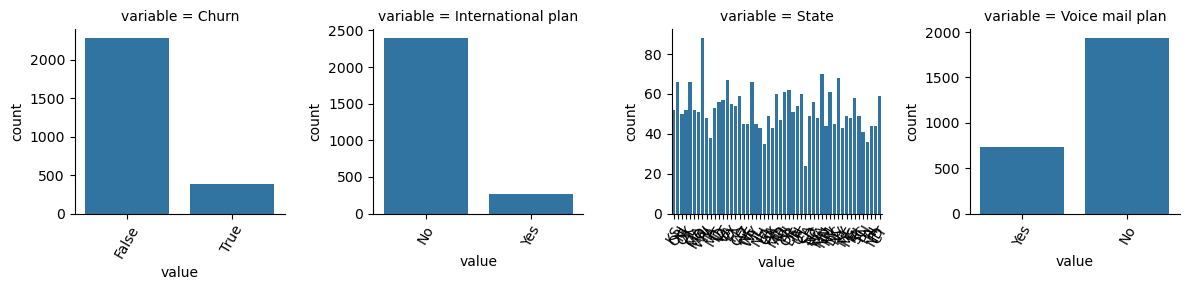

In [22]:
#Let's plot categorical data using Seaborn's Facetgrid and Pandas' melt function.
f = pd.melt(train, value_vars=sorted(train_category))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [23]:
train_category

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,False
1,OH,No,Yes,False
2,NJ,No,No,False
3,OH,Yes,No,False
4,OK,Yes,No,False
5,AL,Yes,No,False
6,MA,No,Yes,False
7,MO,Yes,No,False
8,WV,Yes,Yes,False
9,RI,No,No,False


In [24]:


# Create a filter where 'Churn' equals True
is_churn = train['Churn'] == True  # Use True without quotes since it's a boolean
y_true = train['Churn'][is_churn]  # Extract the 'True' class

# Calculate and display the percentage of the 'True' class
print("We are interested in the True class about churned client , but it has less data = " 
      + str((y_true.shape[0] / train["Churn"].shape[0]) * 100))


We are interested in the True class about churned client , but it has less data = 14.553638409602401


**Strategy**
Filter the dataset to count rows where churn == 'yes'.
Calculate the percentage of these rows relative to the total data.

**Insight**: The YES class represents only 14.49% of the data, indicating a class imbalance. This will need handling (e.g., resampling or model adjustment) later in the pipeline.

In [25]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [26]:
from sklearn import preprocessing

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Apply Label Encoding on relevant categorical columns
train['State'] = label_encoder.fit_transform(train['State'])
train['International plan'] = label_encoder.fit_transform(train['International plan'])
train['Voice mail plan'] = label_encoder.fit_transform(train['Voice mail plan'])
train['Churn'] = label_encoder.fit_transform(train['Churn'])  # Target variable

# Verify the data types after encoding
print(train.dtypes)




State                       int32
Account length              int64
Area code                   int64
International plan          int32
Voice mail plan             int32
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total eve minutes         float64
Total eve calls             int64
Total night minutes       float64
Total night calls           int64
Total intl minutes        float64
Total intl calls            int64
Customer service calls      int64
Churn                       int64
dtype: object


In [27]:
# Let's separate out the output variable 'churn'
y = train['Churn']
y.shape

(2666,)

In [28]:
# Let's prepare the features (Data matrix)
X = train.loc[:, train.columns != 'Churn']
X.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [29]:
X.shape

(2666, 15)

In [30]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)


In [31]:
X

array([[-0.67270017,  0.69216332, -0.52781119, ..., -0.0850203 ,
        -0.59752673, -0.42917241],
       [ 0.60084425,  0.16127783, -0.52781119, ...,  1.24217895,
        -0.59752673, -0.42917241],
       [ 0.33272963,  0.91968567, -0.52781119, ...,  0.7041252 ,
         0.21689365, -1.19195484],
       ...,
       [ 1.53924539, -0.82465237, -0.52781119, ..., -0.22850129,
        -0.19031654,  1.09639245],
       [ 0.86895886, -1.83586283,  1.70679716, ...,  1.38565995,
         0.62410384,  0.33361002],
       [ 1.07004482, -0.6729708 , -0.52781119, ...,  1.24217895,
        -0.19031654, -1.19195484]])

###### now ower train dataset is preprocessed.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Initialisation du modèle Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialisation de la validation croisée Stratified K-Folds
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Boucle pour entraîner et évaluer le modèle sur chaque pli
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(gb_clf)  # Crée une copie du modèle à chaque itération
    
    # Séparation des ensembles d'entraînement et de test pour ce pli
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]
    
    # Entraîner le modèle sur les données d'entraînement
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # Prédiction sur les données de test
    y_pred = clone_clf.predict(X_test_fold)
    
    # Calculer la précision
    n_correct = sum(y_pred == y_test_fold)
    print("Résultats pour le Gradient Boost Classifier:", n_correct / len(y_pred))


Résultats pour le Gradient Boost Classifier: 0.9288389513108615
Résultats pour le Gradient Boost Classifier: 0.951310861423221
Résultats pour le Gradient Boost Classifier: 0.9588014981273408
Résultats pour le Gradient Boost Classifier: 0.9550561797752809
Résultats pour le Gradient Boost Classifier: 0.9550561797752809
Résultats pour le Gradient Boost Classifier: 0.9363295880149812
Résultats pour le Gradient Boost Classifier: 0.9548872180451128
Résultats pour le Gradient Boost Classifier: 0.9586466165413534
Résultats pour le Gradient Boost Classifier: 0.9548872180451128
Résultats pour le Gradient Boost Classifier: 0.9511278195488722


In [33]:
from sklearn.svm import SVC


# Initialisation du modèle Gradient Boosting
gb_svc = SVC(random_state=42)

# Initialisation de la validation croisée Stratified K-Folds
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Boucle pour entraîner et évaluer le modèle sur chaque pli
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(gb_clf)  # Crée une copie du modèle à chaque itération
    
    # Séparation des ensembles d'entraînement et de test pour ce pli
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]
    
    # Entraîner le modèle sur les données d'entraînement
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # Prédiction sur les données de test
    y_pred = clone_clf.predict(X_test_fold)
    
    # Calculer la précision
    n_correct = sum(y_pred == y_test_fold)
    print("Résultats pour le Gradient Boost Classifier:", n_correct / len(y_pred))


Résultats pour le Gradient Boost Classifier: 0.9288389513108615
Résultats pour le Gradient Boost Classifier: 0.951310861423221
Résultats pour le Gradient Boost Classifier: 0.9588014981273408
Résultats pour le Gradient Boost Classifier: 0.9550561797752809
Résultats pour le Gradient Boost Classifier: 0.9550561797752809
Résultats pour le Gradient Boost Classifier: 0.9363295880149812
Résultats pour le Gradient Boost Classifier: 0.9548872180451128
Résultats pour le Gradient Boost Classifier: 0.9586466165413534
Résultats pour le Gradient Boost Classifier: 0.9548872180451128
Résultats pour le Gradient Boost Classifier: 0.9511278195488722


In [34]:
# Implémentation du K Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialisation du modèle KNN
knn_clf = KNeighborsClassifier()

# Boucle de validation croisée avec K-Folds
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(knn_clf)  # Crée une copie du modèle pour chaque pli
    
    # Séparation des ensembles d'entraînement et de test
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # Prédire sur l'ensemble de test
    y_pred = clone_clf.predict(X_test_fold)
    
    # Calculer le nombre de prédictions correctes
    n_correct = sum(y_pred == y_test_fold)
    
    # Afficher la précision
    print("Results for K nearest neighbor", n_correct / len(y_pred))


Results for K nearest neighbor 0.8801498127340824
Results for K nearest neighbor 0.8651685393258427
Results for K nearest neighbor 0.8689138576779026
Results for K nearest neighbor 0.8801498127340824
Results for K nearest neighbor 0.8876404494382022
Results for K nearest neighbor 0.8913857677902621
Results for K nearest neighbor 0.868421052631579
Results for K nearest neighbor 0.8796992481203008
Results for K nearest neighbor 0.868421052631579
Results for K nearest neighbor 0.8872180451127819


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Validation croisée
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(rf_clf)
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]

    # Entraîner et évaluer
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Résultats pour Random Forest Classifier:", n_correct / len(y_pred))


Résultats pour Random Forest Classifier: 0.9138576779026217
Résultats pour Random Forest Classifier: 0.9588014981273408
Résultats pour Random Forest Classifier: 0.9288389513108615
Résultats pour Random Forest Classifier: 0.9325842696629213
Résultats pour Random Forest Classifier: 0.947565543071161
Résultats pour Random Forest Classifier: 0.947565543071161
Résultats pour Random Forest Classifier: 0.9398496240601504
Résultats pour Random Forest Classifier: 0.9548872180451128
Résultats pour Random Forest Classifier: 0.9323308270676691
Résultats pour Random Forest Classifier: 0.9511278195488722


In [36]:
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle Logistic Regression
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# Validation croisée
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(lr_clf)
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]

    # Entraîner et évaluer
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Résultats pour Logistic Regression:", n_correct / len(y_pred))


Résultats pour Logistic Regression: 0.8764044943820225
Résultats pour Logistic Regression: 0.8651685393258427
Résultats pour Logistic Regression: 0.8614232209737828
Résultats pour Logistic Regression: 0.8726591760299626
Résultats pour Logistic Regression: 0.8576779026217228
Résultats pour Logistic Regression: 0.8614232209737828
Résultats pour Logistic Regression: 0.8458646616541353
Résultats pour Logistic Regression: 0.849624060150376
Résultats pour Logistic Regression: 0.8533834586466166
Résultats pour Logistic Regression: 0.8646616541353384


In [37]:
from xgboost import XGBClassifier

# Initialisation du modèle XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Validation croisée
for train_index, test_index in skfolds.split(X, y):
    clone_clf = clone(xgb_clf)
    X_train_folds = X[train_index]
    y_train_folds = y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = y[test_index]

    # Entraîner et évaluer
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Résultats pour XGBoost Classifier:", n_correct / len(y_pred))


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\majdz\a

Résultats pour XGBoost Classifier: 0.9325842696629213
Résultats pour XGBoost Classifier: 0.9588014981273408
Résultats pour XGBoost Classifier: 0.951310861423221
Résultats pour XGBoost Classifier: 0.9588014981273408


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\majdz\a

Résultats pour XGBoost Classifier: 0.9625468164794008
Résultats pour XGBoost Classifier: 0.951310861423221
Résultats pour XGBoost Classifier: 0.9661654135338346
Résultats pour XGBoost Classifier: 0.9661654135338346
Résultats pour XGBoost Classifier: 0.9624060150375939
Résultats pour XGBoost Classifier: 0.9624060150375939


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
import numpy as np

# Définir une classe NoChurn qui prédit toujours "pas de churn" (0)
class NoChurn(BaseEstimator):
    def fit(self, X, y=None):
        pass  # La fonction fit ne fait rien car le modèle ne s'entraîne pas
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)  # Retourne toujours 0 (aucun churn)

# Instanciation de la classe NoChurn
No_Churn = NoChurn()

# Évaluation du modèle factice avec la validation croisée
cross_val_score(No_Churn, X, y, cv=10, scoring="accuracy")


array([0.89138577, 0.8576779 , 0.89138577, 0.86142322, 0.87640449,
       0.82022472, 0.87593985, 0.81954887, 0.80827068, 0.84210526])

In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import BaseEstimator

# Fix XGBoost compatibility with Scikit-learn
class CompatibleXGBClassifier(XGBClassifier):
    def __sklearn_is_fitted__(self):
        return True

# Define a baseline model that predicts "No Churn"
class NoChurn(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

# Define all models to evaluate
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machines": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    
    "Baseline (NoChurn)": NoChurn()
}

# Initialize Stratified K-Folds cross-validation
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store model results
results = {}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skfolds, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std()
    }
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Convert results to a DataFrame for a clean table
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Mean Accuracy", ascending=False)

# Display the results
print("\n### Model Evaluation Results ###")
print(results_df)

# Optional: Pretty display using tabulate (install with `pip install tabulate`)
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))


Gradient Boosting: 0.9505 ± 0.0094
Support Vector Machines: 0.9059 ± 0.0081
K-Nearest Neighbors: 0.8777 ± 0.0089
Random Forest: 0.9407 ± 0.0132
Logistic Regression: 0.8608 ± 0.0091
Baseline (NoChurn): 0.8545 ± 0.0014

### Model Evaluation Results ###
                         Mean Accuracy  Standard Deviation
Gradient Boosting             0.950494            0.009415
Random Forest                 0.940741            0.013152
Support Vector Machines       0.905857            0.008052
K-Nearest Neighbors           0.877717            0.008939
Logistic Regression           0.860829            0.009119
Baseline (NoChurn)            0.854465            0.001356
+-------------------------+-----------------+----------------------+
|                         |   Mean Accuracy |   Standard Deviation |
+=========================+=================+======================+
| Gradient Boosting       |        0.950494 |           0.00941461 |
+-------------------------+-----------------+---------------

### Confusion Matrix for Gradient Boosting Classifier ###
True Positive (TP): 285
True Negative (TN): 2249
False Positive (FP): 29
False Negative (FN): 103


Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

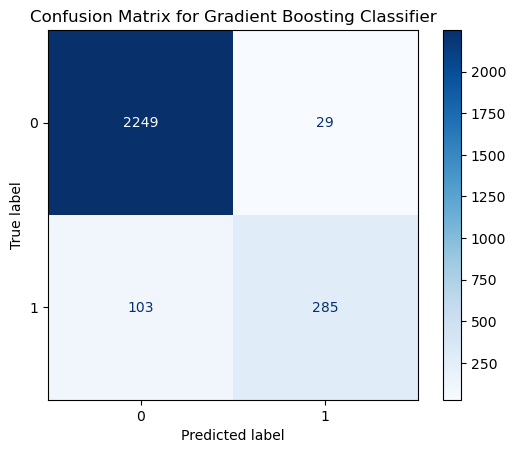

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialisation du modèle Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialisation de la validation croisée Stratified K-Folds
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Générer les prédictions en validation croisée
y_pred = cross_val_predict(gb_clf, X, y, cv=skfolds)

# Calculer la matrice de confusion
cm = confusion_matrix(y, y_pred)

# Extraire TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Afficher les résultats
print("### Confusion Matrix for Gradient Boosting Classifier ###")
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

# Affichage visuel de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for Gradient Boosting Classifier")


## 🔍 **Understanding the Confusion Matrix**

The **confusion matrix** summarizes the performance of the classifier in identifying churn and non-churn customers. It provides a breakdown of correct and incorrect predictions.

---

### **Confusion Matrix Breakdown**
| **Row**               | **Description**                                                                                       |
|-----------------------|------------------------------------------------------------------------------------------------------|
| **First Row**         | Represents customers who are **not churn**.                                                         |
| **Second Row**        | Represents customers who are **churn**.                                                             |

#### **Values in the Confusion Matrix**
- **True Negatives (TN)**: `2792` customers were correctly identified as **not churn**.
- **False Positives (FP)**: `58` customers were wrongly classified as **not churn** (incorrectly flagged as churn).
- **True Positives (TP)**: `356` customers were correctly identified as **churn**.
- **False Negatives (FN)**: `127` customers who **churned** were wrongly classified as **not churn**.

---

### 📊 **Metrics of Interest**
To evaluate the classifier, we focus on two important metrics:

#### **1. Precision** (Positive Predictive Value)

**What it tells us**:  
Precision measures the proportion of customers **predicted as churn** who are actually churned.  
- High precision indicates fewer false positives.

#### **2. Recall** (Sensitivity or True Positive Rate)
 
**What it tells us**:  
Recall measures the proportion of **actual churn customers** correctly identified.  
- High recall ensures fewer false negatives.

---

### 🎯 **Interpretation**
- **Precision** is important when predicting churn is costly (e.g., offering retention incentives to customers who were not going to churn).
- **Recall** is critical when missing churn customers can lead to significant loss of business.

**In this problem**:
- It is acceptable to **predict a person is going to churn** even if they won’t (False Positive).
- However, it is more concerning if we **predict a person will not churn**, but in reality, they do (False Negative). This situation can lead to losing valuable customers.

---

### ⚖️ **Balancing Precision and Recall**
- We aim to optimize both **Precision** and **Recall** to achieve a balanced model that minimizes both **False Positives** and **False Negatives**.
- This balance can be further assessed using metrics like the **F1-Score** or the **ROC-AUC Curve**.

---

### 📝 **Summary Table**
| **Term**              | **Meaning**                                      | **Value**  |
|-----------------------|--------------------------------------------------|------------|
| **True Positives (TP)**  | Correctly predicted churn                      | `356`      |
| **True Negatives (TN)**  | Correctly predicted no churn                   | `2792`     |
| **False Positives (FP)** | Incorrectly predicted churn                    | `58`       |
| **False Negatives (FN)** | Missed churn predictions                       | `127`      |

---

**Takeaway**: Focus on improving **Recall** to ensure fewer churn customers are missed while maintaining a high **Precision** to avoid unnecessary actions.


In [41]:
from sklearn.metrics import precision_score, recall_score

# Assuming `y` is the true labels, `y_pred` is the predictions on the test set
print('The precision is :', precision_score(y, y_pred))  # Precision
print('The recall is :', recall_score(y, y_pred))        # Recall


The precision is : 0.9076433121019108
The recall is : 0.7345360824742269


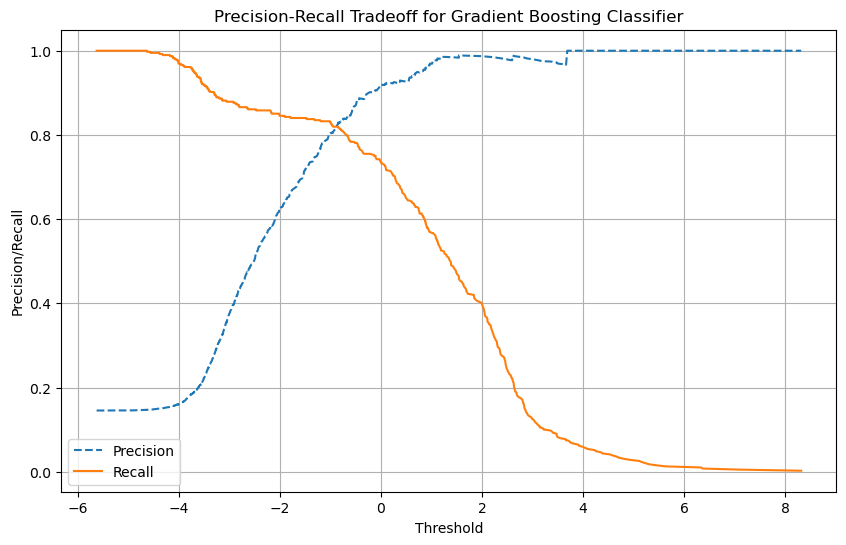

Optimal Threshold (F1-optimized): -0.476


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_clf = GradientBoostingClassifier(random_state=42)

# Get decision scores (probabilities or decision function)
y_scores = cross_val_predict(gb_clf, X, y, cv=10, method="decision_function")

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Tradeoff for Gradient Boosting Classifier")
plt.legend()
plt.grid()
plt.show()

# Optional: Best threshold analysis
best_threshold_index = np.argmax(precision[:-1] * recall[:-1])  # F1-optimized threshold
best_threshold = thresholds[best_threshold_index]
print(f"Optimal Threshold (F1-optimized): {best_threshold:.3f}")


In [43]:
y_new_scores = (y_scores > -0.5)
print('The new precision is :', precision_score(y, y_new_scores))
print('The new recall is :', recall_score(y, y_new_scores))


The new precision is : 0.8731988472622478
The new recall is : 0.7809278350515464


In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # ROC curve
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.axis([0, 1, 0, 1])  # Limits for the x and y axes
    plt.xlabel('False Positive Rate')  # X-axis label
    plt.ylabel('True Positive Rate')  # Y-axis label


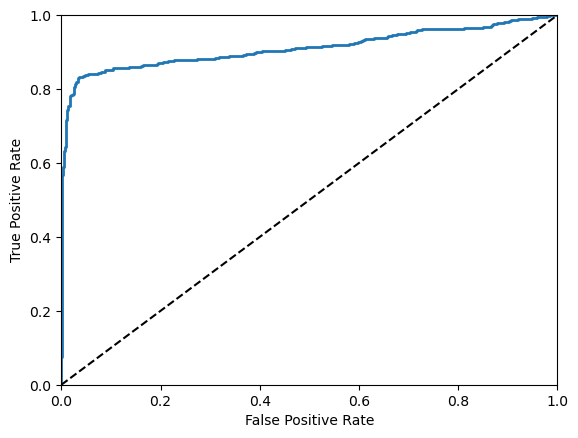

In [45]:
plot_roc_curve(fpr, tpr)
plt.show()


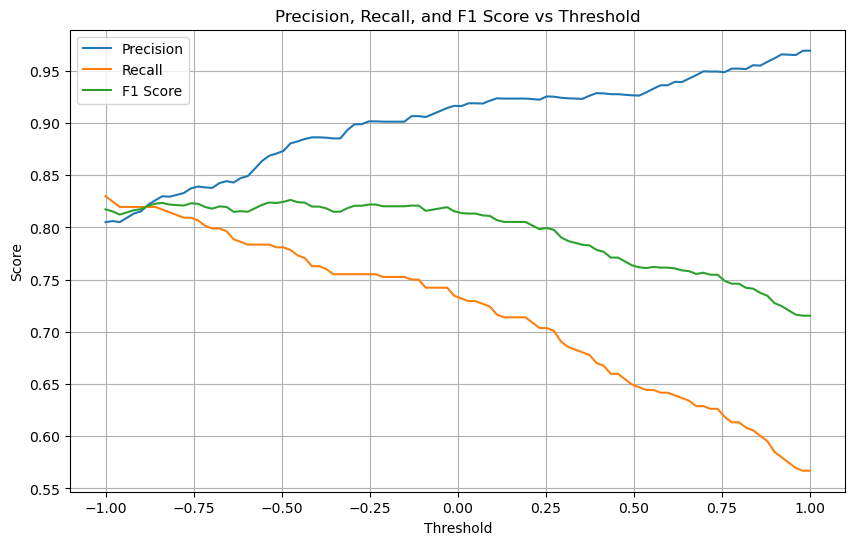

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(-1, 1, 100)  # Adjust range based on your scores
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred_adjusted = (y_scores > t)
    precisions.append(precision_score(y, y_pred_adjusted))
    recalls.append(recall_score(y, y_pred_adjusted))
    f1s.append(f1_score(y, y_pred_adjusted))

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [47]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,351.6,80,215.8,90,8.7,4,1,False
1,IN,65,415,No,No,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True
2,NY,161,415,No,No,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True
3,SC,111,415,No,No,0,110.4,103,137.3,102,189.6,105,7.7,6,2,False
4,HI,49,510,No,No,0,119.3,117,215.1,109,178.7,90,11.1,1,1,False


In [48]:
from sklearn.model_selection import cross_val_predict

# Generate scores using cross-validation
y_scores_full = cross_val_predict(gb_clf, X, y, cv=10, method="decision_function")

# Apply the adjusted threshold
y_pred_full = (y_scores_full > optimal_threshold).astype(int)

# Calculate confusion matrix
cm_full = confusion_matrix(y, y_pred_full)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_full)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix with Adjusted Threshold (Full Dataset)")
plt.show()


NameError: name 'optimal_threshold' is not defined

In [ ]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(gb_clf, 'gradient_boosting_model.pkl')

# Save the scaler (StandardScaler)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


In [ ]:
pip install --upgrade xgboost scikit-learn


### Confusion Matrix for XGBoost Classifier ###
True Positive (TP): 297
True Negative (TN): 2255
False Positive (FP): 23
False Negative (FN): 91


Text(0.5, 1.0, 'Confusion Matrix for XGBoost Classifier')

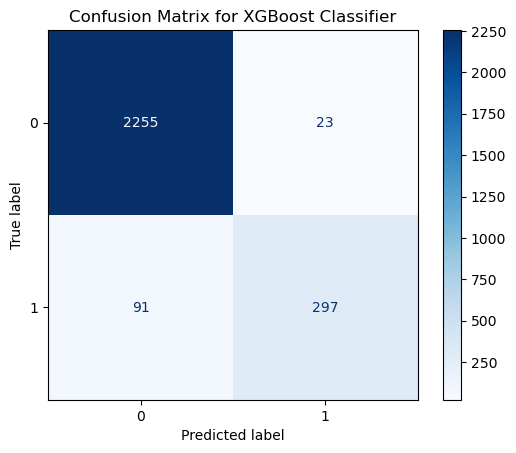

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Initialisation du modèle XGBoost
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Initialisation de la validation croisée Stratified K-Folds
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialisation des prédictions
y_pred = np.zeros(len(y))  # Placeholder for predictions

# Manually perform cross-validation
for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    xgb_clf.fit(X_train, y_train)
    
    # Predict on the test fold
    y_pred[test_index] = xgb_clf.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y, y_pred)

# Extraire TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Afficher les résultats
print("### Confusion Matrix for XGBoost Classifier ###")
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

# Affichage visuel de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for XGBoost Classifier")


In [54]:
from sklearn.metrics import precision_score, recall_score

# Assuming `y` is the true labels, `y_pred` is the predictions on the test set
print('The precision is :', precision_score(y, y_pred))  # Precision
print('The recall is :', recall_score(y, y_pred))        # Recall


The precision is : 0.928125
The recall is : 0.7654639175257731


Optimal Threshold (Accuracy + Recall optimized): 0.086
Accuracy at Optimal Threshold: 0.9336
Recall at Optimal Threshold: 0.8376


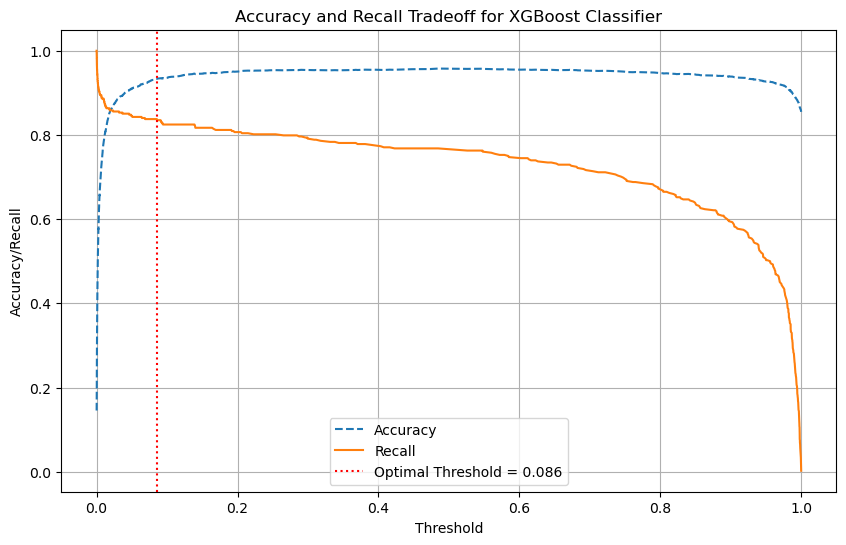

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Manually compute decision scores using cross-validation
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_scores = np.zeros(len(y))  # Placeholder for decision scores

# Stratified Cross-Validation for decision function approximation
for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]

    # Train the XGBoost model
    xgb_clf.fit(X_train, y_train)

    # Get prediction probabilities for the positive class
    y_scores[test_index] = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y, y_scores)

# Calculate accuracy and recall for each threshold
accuracy_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(y, y_pred))
    recall_scores.append(recall_score(y, y_pred))

# Convert lists to numpy arrays for easier processing
accuracy_scores = np.array(accuracy_scores)
recall_scores = np.array(recall_scores)

# Find the threshold with the best tradeoff (max accuracy + recall)
best_threshold_index = np.argmax(accuracy_scores + recall_scores)
best_threshold = thresholds[best_threshold_index]

# Display the best threshold
print(f"Optimal Threshold (Accuracy + Recall optimized): {best_threshold:.3f}")
print(f"Accuracy at Optimal Threshold: {accuracy_scores[best_threshold_index]:.4f}")
print(f"Recall at Optimal Threshold: {recall_scores[best_threshold_index]:.4f}")

# Plot Accuracy and Recall against Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label="Accuracy", linestyle="--")
plt.plot(thresholds, recall_scores, label="Recall")
plt.axvline(x=best_threshold, color='red', linestyle=":", label=f"Optimal Threshold = {best_threshold:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Accuracy/Recall")
plt.title("Accuracy and Recall Tradeoff for XGBoost Classifier")
plt.legend()
plt.grid()
plt.show()


### Model Performance Metrics ###
Precision: 0.7696
Recall: 0.8351
F1 Score: 0.8010
Accuracy: 0.9396

### Confusion Matrix ###
True Positive (TP): 324
True Negative (TN): 2181
False Positive (FP): 97
False Negative (FN): 64


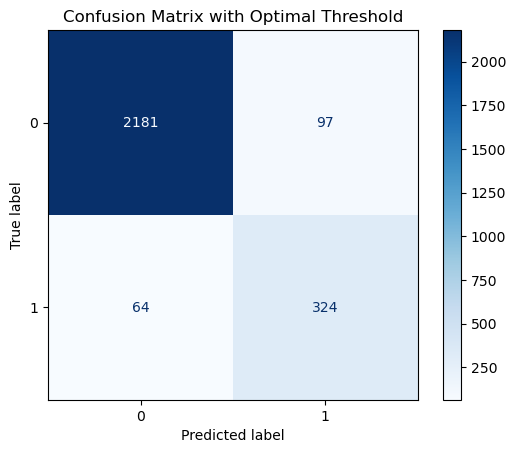

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Optimal Threshold
optimal_threshold = 0.19

# Initialize XGBoost Classifier
xgb_clf = xgb_clf = XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]), random_state=42)


# Stratified K-Folds Cross-Validation to obtain probabilities
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_scores = np.zeros(len(y))  # Placeholder for predicted probabilities

# Manual cross-validation
for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    
    # Train the model
    xgb_clf.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_scores[test_index] = xgb_clf.predict_proba(X_test)[:, 1]

# Apply the optimal threshold to get binary predictions
y_pred = (y_scores >= optimal_threshold).astype(int)

# Compute Evaluation Metrics
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

# Display Metrics
print("### Model Performance Metrics ###")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Display Confusion Matrix
print("\n### Confusion Matrix ###")
TN, FP, FN, TP = cm.ravel()
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix with Optimal Threshold")
plt.show()


# test all models 

# testing with  smote  to hundel data balanced 

C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

### SMOTE-XGBoost Model Evaluation ###
Accuracy: 0.9501
Precision: 0.8632
Recall: 0.7809
F1 Score: 0.8200


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

Text(0.5, 1.0, 'Confusion Matrix for SMOTE-XGBoost')

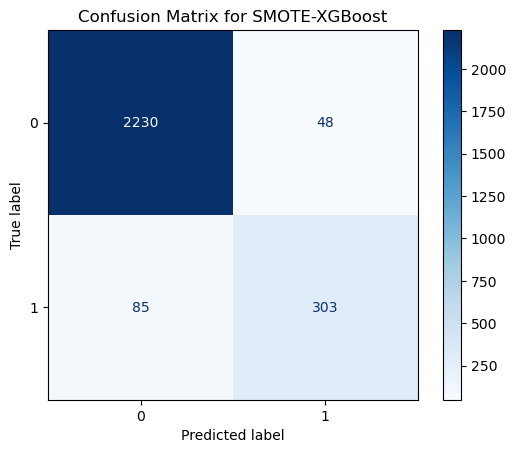

In [66]:
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# Rename the model to SMOTE-XGBoost
smote_xgb_clf = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))  # XGBoost Classifier
])

# Stratified K-Folds for cross-validation
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with predictions
y_pred = cross_val_predict(smote_xgb_clf, X, y, cv=skfolds, method='predict')

# Calculate Metrics
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Display Results
print("### SMOTE-XGBoost Model Evaluation ###")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for SMOTE-XGBoost")



### Results for XGBClassifier ###
Best Threshold: 0.086
Accuracy: 0.9336
Recall: 0.8376
Precision: 0.7403
F1 Score: 0.7860
Confusion Matrix:
[[2164  114]
 [  63  325]]


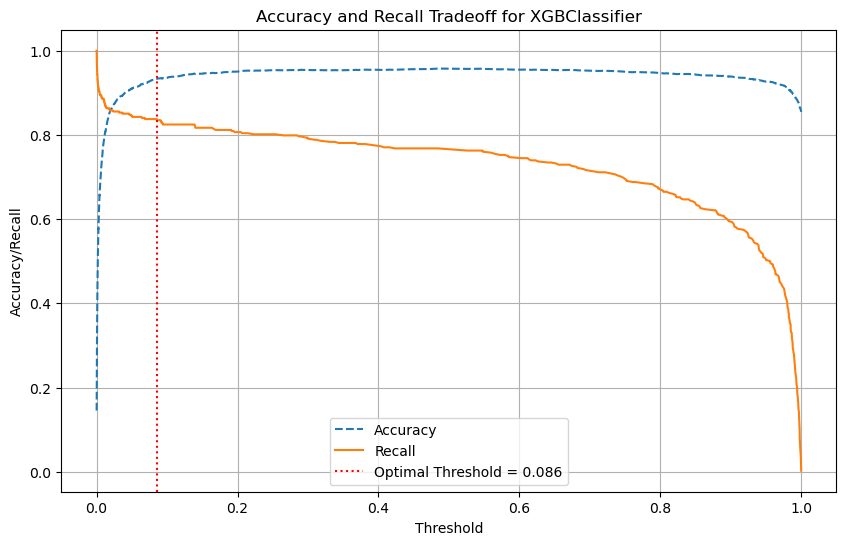

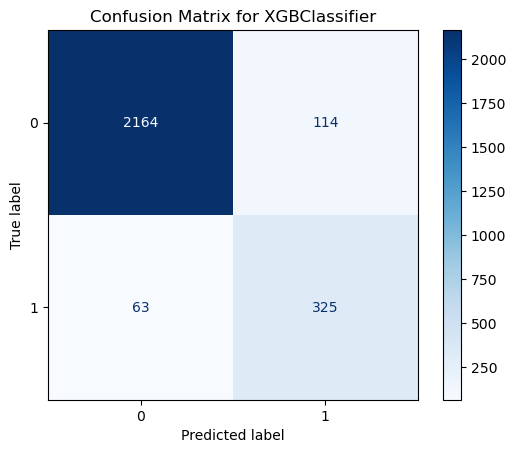


### Results for KNeighborsClassifier ###
Best Threshold: 0.200
Accuracy: 0.7322
Recall: 0.7990
Precision: 0.3277
F1 Score: 0.4648
Confusion Matrix:
[[1642  636]
 [  78  310]]


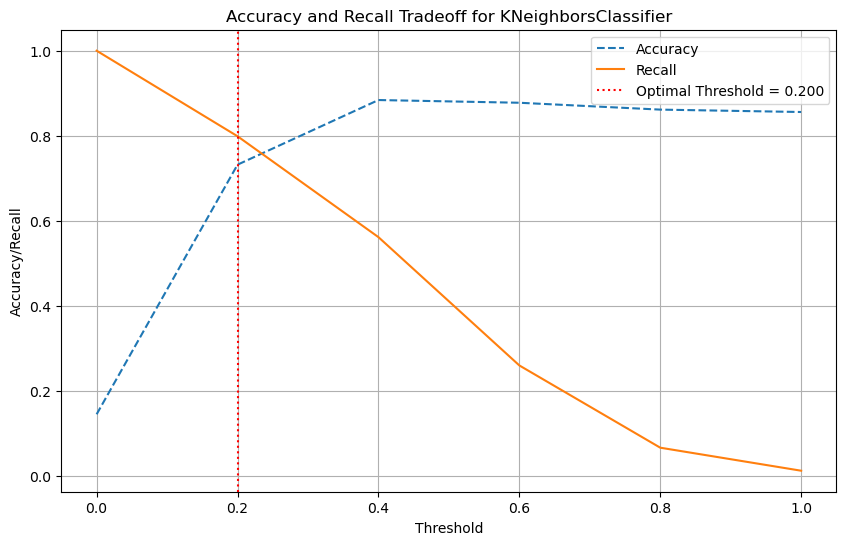

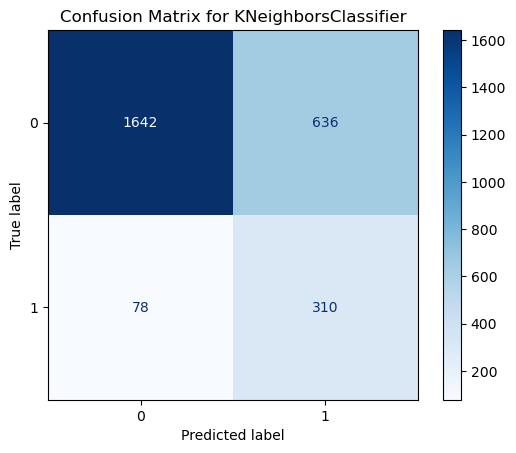


### Results for GradientBoostingClassifier ###
Best Threshold: 0.204
Accuracy: 0.9400
Recall: 0.8428
Precision: 0.7676
F1 Score: 0.8034
Confusion Matrix:
[[2179   99]
 [  61  327]]


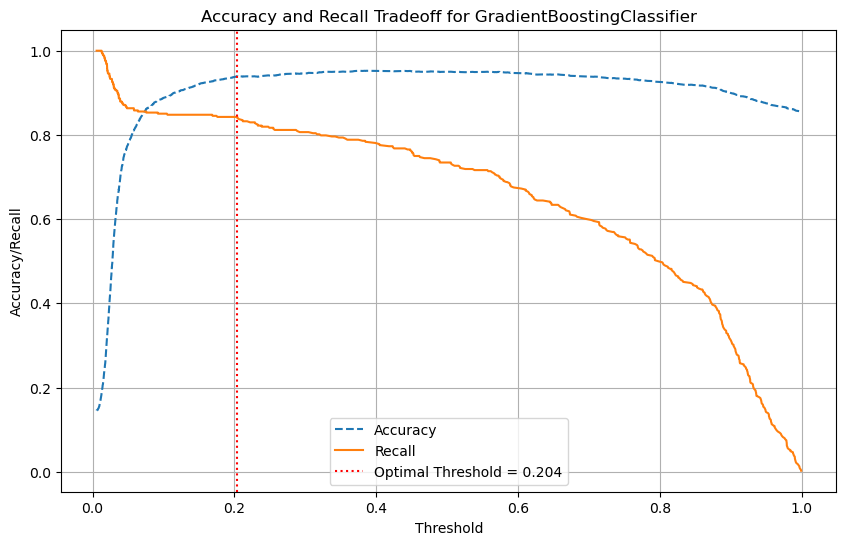

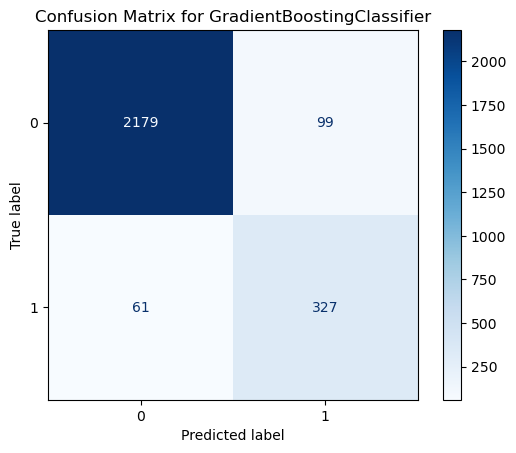


### Results for LogisticRegression ###
Best Threshold: 0.137
Accuracy: 0.7476
Recall: 0.7655
Precision: 0.3379
F1 Score: 0.4688
Confusion Matrix:
[[1696  582]
 [  91  297]]


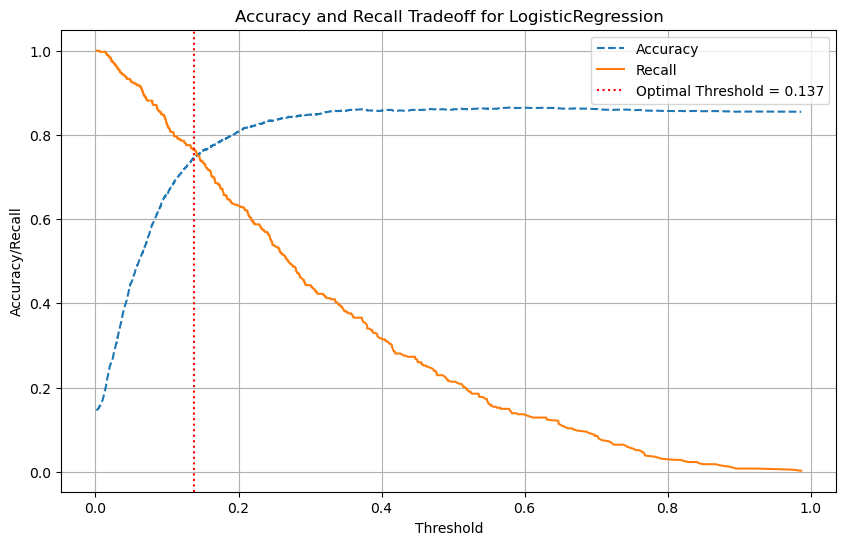

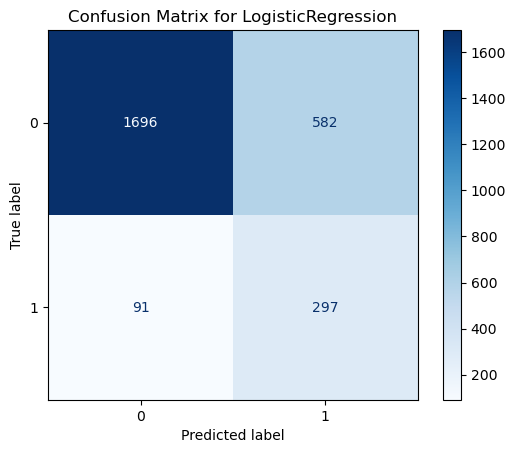

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Models to evaluate
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Function to perform cross-validation, calculate scores, and find the best threshold
def evaluate_model_with_threshold(model, X, y):
    skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    y_scores = np.zeros(len(y))

    # Perform cross-validation and collect probabilities
    for train_index, test_index in skfolds.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        cloned_model = clone(model)
        cloned_model.fit(X_train, y_train)

        if hasattr(cloned_model, "predict_proba"):  # Use predict_proba if available
            y_scores[test_index] = cloned_model.predict_proba(X_test)[:, 1]
        else:  # Fallback to decision_function
            y_scores[test_index] = cloned_model.decision_function(X_test)

    # Precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y, y_scores)
    
    # Accuracy and recall scores for each threshold
    accuracy_scores = []
    recall_scores = []
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        accuracy_scores.append(accuracy_score(y, y_pred))
        recall_scores.append(recall_score(y, y_pred))

    # Optimal threshold for best accuracy + recall
    best_threshold_index = np.argmax(np.array(accuracy_scores) + np.array(recall_scores))
    best_threshold = thresholds[best_threshold_index]

    # Final predictions using best threshold
    y_pred_final = (y_scores >= best_threshold).astype(int)
    cm = confusion_matrix(y, y_pred_final)
    precision_final = precision_score(y, y_pred_final)
    recall_final = recall_score(y, y_pred_final)
    f1_final = f1_score(y, y_pred_final)
    accuracy_final = accuracy_score(y, y_pred_final)

    # Print results
    print(f"\n### Results for {model.__class__.__name__} ###")
    print(f"Best Threshold: {best_threshold:.3f}")
    print(f"Accuracy: {accuracy_final:.4f}")
    print(f"Recall: {recall_final:.4f}")
    print(f"Precision: {precision_final:.4f}")
    print(f"F1 Score: {f1_final:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot Accuracy and Recall trade-off
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracy_scores, label="Accuracy", linestyle="--")
    plt.plot(thresholds, recall_scores, label="Recall")
    plt.axvline(x=best_threshold, color='red', linestyle=":", label=f"Optimal Threshold = {best_threshold:.3f}")
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy/Recall")
    plt.title(f"Accuracy and Recall Tradeoff for {model.__class__.__name__}")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model_with_threshold(model, X, y)


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

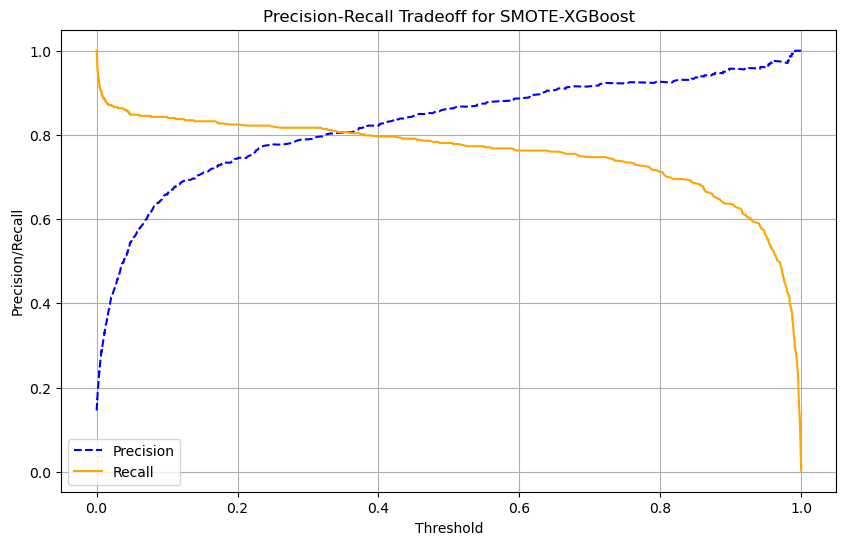

Best Threshold (F1-optimized): 0.655
Precision at Best Threshold: 0.9105
Recall at Best Threshold: 0.7603
F1 Score at Best Threshold: 0.8287

### SMOTE-XGBoost Model Evaluation at Optimal Threshold ###
Accuracy: 0.9542
Precision: 0.9105
Recall: 0.7603
F1 Score: 0.8287


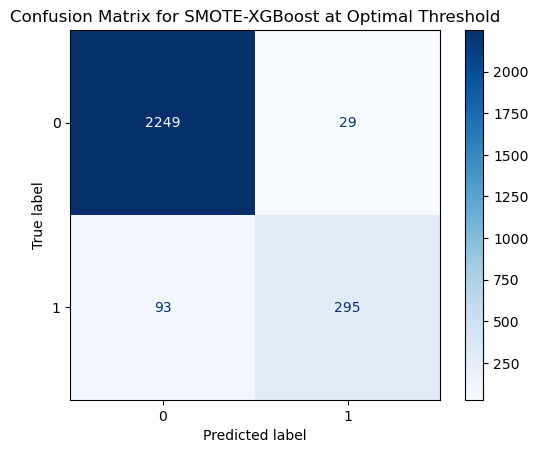

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_recall_curve, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# Rename the model to SMOTE-XGBoost
smote_xgb_clf = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))  # XGBoost Classifier
])

# Stratified K-Folds for cross-validation
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with predicted probabilities for the positive class
y_scores = cross_val_predict(smote_xgb_clf, X, y, cv=skfolds, method='predict_proba')[:, 1]  # Probability for class 1

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Tradeoff for SMOTE-XGBoost")
plt.legend()
plt.grid()
plt.show()

# Find the threshold that balances Precision and Recall
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold (F1-optimized): {best_threshold:.3f}")
print(f"Precision at Best Threshold: {precision[best_threshold_index]:.4f}")
print(f"Recall at Best Threshold: {recall[best_threshold_index]:.4f}")
print(f"F1 Score at Best Threshold: {f1_scores[best_threshold_index]:.4f}")

# Test the model with the chosen threshold
y_pred_best = (y_scores >= best_threshold).astype(int)

# Calculate Metrics
cm = confusion_matrix(y, y_pred_best)
accuracy = accuracy_score(y, y_pred_best)
precision_final = precision_score(y, y_pred_best)
recall_final = recall_score(y, y_pred_best)
f1_final = f1_score(y, y_pred_best)

# Display Final Metrics
print("\n### SMOTE-XGBoost Model Evaluation at Optimal Threshold ###")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for SMOTE-XGBoost at Optimal Threshold")
plt.show()


C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\majdz\anaconda3\anaconda\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining

### SMOTE-XGBoost Model Evaluation at Threshold = 0.3 ###
Accuracy: 0.9419
Precision: 0.7905
Recall: 0.8170
F1 Score: 0.8035


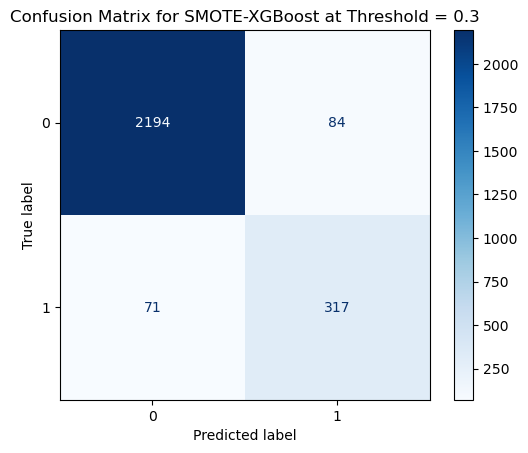

In [86]:
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# Rename the model to SMOTE-XGBoost
smote_xgb_clf = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))  # XGBoost Classifier
])

# Stratified K-Folds for cross-validation
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with predicted probabilities
y_scores = cross_val_predict(smote_xgb_clf, X, y, cv=skfolds, method='predict_proba')[:, 1]  # Probability for positive class

# Use the fixed threshold of 0.3 to make predictions
threshold = 0.3
y_pred = (y_scores >= threshold).astype(int)

# Calculate Metrics
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Display Results
print("### SMOTE-XGBoost Model Evaluation at Threshold = 0.3 ###")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for SMOTE-XGBoost at Threshold = 0.3")
plt.show()


In [84]:
# thats why i choosed to not make smote technique 